DETECTION WITH DNN

In [ ]:
#link với google drive

from google.colab import drive
drive.mount('/content/drive')
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

Mounted at /content/drive


In [ ]:
import requests

# URL cho các tệp mô hình và cấu hình
model_url = "https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel"
config_url = "https://github.com/opencv/opencv/raw/3.4/samples/dnn/face_detector/deploy.prototxt"

# Tải mô hình và tệp cấu hình
model_response = requests.get(model_url)
config_response = requests.get(config_url)

# Lưu mô hình và tệp cấu hình vào ổ đĩa
with open("res10_300x300_ssd_iter_140000.caffemodel", "wb") as model_file:
    model_file.write(model_response.content)

with open("deploy.prototxt", "wb") as config_file:
    config_file.write(config_response.content)

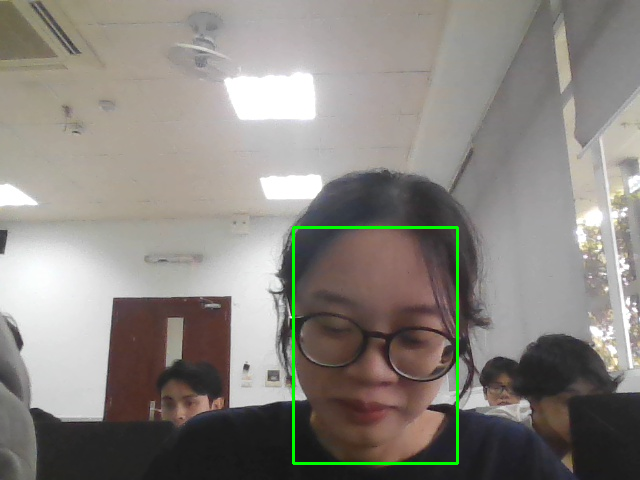

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os

# Đường dẫn đến tệp mô hình và tệp cấu hình
model_path = 'drive/MyDrive/Project_DAP391m_group2/Data/res10.caffemodel'
config_path = 'drive/MyDrive/Project_DAP391m_group2/Data/deploy(1).prototxt'

# Tạo một mô hình mạng nơ-ron sâu
net = cv2.dnn.readNetFromCaffe(config_path, model_path)

# Đường dẫn đến thư mục chứa các hình ảnh cần detect
image_dir = 'drive/MyDrive/Project_DAP391m_group2/Data/total_dataset/train/Cheating'

# Đường dẫn đến thư mục để lưu kết quả
output_dir = 'drive/MyDrive/Project_DAP391m_group2/Data/Data_detected/Train_Cheat'

# Tạo thư mục kết quả nếu chưa tồn tại
os.makedirs(output_dir, exist_ok=True)

# Lặp qua các tệp hình ảnh trong thư mục
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        # Đọc hình ảnh
        image = cv2.imread(os.path.join(image_dir, filename))

        # Chuyển đổi ảnh sang định dạng blob
        blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104, 177, 123))

        # Đưa blob vào mạng để phát hiện khuôn mặt
        net.setInput(blob)
        detections = net.forward()

        # Tìm khuôn mặt lớn nhất
        largest_face = None
        largest_area = 0

        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.5:  # Chọn ngưỡng tin cậy tùy chỉnh
                box = detections[0, 0, i, 3:7] * np.array([image.shape[1], image.shape[0], image.shape[1], image.shape[0]])
                (startX, startY, endX, endY) = box.astype(int)
                face_area = (endX - startX) * (endY - startY)

                if face_area > largest_area:
                    largest_area = face_area
                    largest_face = (startX, startY, endX, endY)

        # Nếu có khuôn mặt lớn nhất, vẽ hộp xung quanh
        if largest_face is not None:
            startX, startY, endX, endY = largest_face
            cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)

        # Lưu kết quả vào một file ảnh trong thư mục kết quả
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, image)

# Hiển thị hình ảnh với khuôn mặt lớn nhất đã phát hiện
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import os

# Đường dẫn đến thư mục chứa ảnh
folder_path = "drive/MyDrive/Project_DAP391m_group2/Data/Data_detected/Face_Detected/Test_Cheat"
output_dir = 'drive/MyDrive/Project_DAP391m_group2/Data/Data_detected/Test_Detected/Test_Cheat_F'

#eye_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Lặp qua tất cả các tệp tin trong thư mục
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Đường dẫn đầy đủ đến tệp tin ảnh
        image_path = os.path.join(folder_path, filename)

        # Đọc ảnh
        image = cv2.imread(image_path)

        # Kiểm tra xem ảnh đã được đọc thành công hay chưa
        if image is not None:
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Thực hiện phát hiện mắt
            eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=4, minSize=(40, 40),
                                               maxSize=(100,100), flags=cv2.CASCADE_SCALE_IMAGE)

            # Vẽ hình chữ nhật xung quanh mắt
            for (x, y, w, h) in eyes:
                cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 5)

            output_path = os.path.join(output_dir, filename)
            cv2.imwrite(output_path, image)

# Hiển thị ảnh đã phát hiện mắt
cv2_imshow(image)
cv2.waitKey(0)

# Đóng tất cả các cửa sổ hiển thị
cv2.destroyAllWindows()